In [1]:
import sys

In [2]:
sys.path.append('c:/Users\mekho\Documents\PycharmProjects\Quiz_Food_LinkedIn')

In [3]:
import pandas as pd
from tools.compute_areas_overlap import find_area_mapper
import us
import seaborn as sns

In [4]:
path_park_data_by_county = "../data/Parks/park_access_by_county/data_171554.csv"
df_park_data = pd.read_csv(path_park_data_by_county)
df_park_data.columns

#####################################################################################################
path_map_county_to_urban = "../data/Parks/park_access_by_county/ua_county_rel_10.txt"
df_map_county_to_urban = pd.read_csv(path_map_county_to_urban, sep=",", encoding='latin-1')
df_map_county_to_urban.columns

all_counties = [c.replace('County', '').strip() for c in df_map_county_to_urban.CNAME]
df_map_county_to_urban['county_name_stripped'] = all_counties
len(all_counties)
len(set(all_counties))
len(set(df_map_county_to_urban.CNAME))
len(set(df_park_data.County))

print(len(set(df_park_data.County) - set(all_counties)))
print(set(df_park_data.County) - set(all_counties))

mapper_all = find_area_mapper(list_area_1=list(set(df_park_data.County) - set(all_counties)),
                              list_area_2=list(all_counties),
                              stop_words=["city", "new", "county", "falls", "st."])

mapper_2 = {i: i for i in all_counties}

mapper_all.update(mapper_2)

## to map counties using mapper_all
df_park_data.County = [c.strip() for c in df_park_data.County]
df_park_data.County = df_park_data.County.map(mapper_all)
set(df_park_data.County) - set(mapper_all.keys())

## to add statistical metropoletan using df_map_county_to_urban
df_map_county_to_urban.columns
df_map_county_to_urban.CNAME
set(df_map_county_to_urban.UANAME)

# mapper_county_to_metro = dict(zip(df_map_county_to_urban.CNAME, df_map_county_to_urban.UANAME))



97
{'Bossier', 'Bristol Bay', 'Waynesboro', 'PRINCE OF WALES-HYDER CENSUS AREA', 'Baltimore City', 'Northwest Arctic', 'Fairfax City', 'Alexandria', 'Fairbanks North Star', 'Martinsville', 'St. Martin', 'Sitka', 'Chesapeake', 'Catahoula', 'Bienville', 'Iberia', 'Dillingham', 'Plaquemines', 'Portsmouth', 'West Carroll', 'St. James', 'Acadia', 'Richmond City', 'Wade Hampton', 'Haines', 'Radford', 'HOONAH-ANGOON CENSUS AREA', 'St. Landry', 'Colonial Heights', 'Franklin City', 'East Baton Rouge', 'St. John the Baptist', 'Terrebonne', 'Virginia Beach', 'Galax', 'Nome', 'Yukon-Koyukuk', 'Calcasieu', 'Rapides', 'St. Louis City', 'Lafourche', 'Anchorage', 'Roanoke City', 'Hopewell', 'Tensas', 'Dona Ana', 'St. Bernard', 'Kenai Peninsula', 'West Baton Rouge', 'Poquoson', 'St. Helena', 'Falls Church', 'Charlottesville', 'Manassas Park', 'Harrisonburg', 'Winchester', 'Ketchikan Gateway', 'SKAGWAY MUNICIPALITY', 'Pointe Coupee', 'Evangeline', 'Kodiak Island', 'Valdez-Cordova', 'Bethel', 'Beauregard

C:\Users\mekho\Documents\PycharmProjects\venvs\LinkedIn_Quiz_env\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['st'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'Ellijay, GA Urban Cluster',
 'Aspen, CO Urban Cluster',
 'Marana West, AZ Urban Cluster',
 'DeRidder, LA Urban Cluster',
 'Dickinson, ND Urban Cluster',
 'West Point, MS Urban Cluster',
 'Moundville, AL Urban Cluster',
 'Ashville, OH Urban Cluster',
 'Great Barrington, MA Urban Cluster',
 'Homedale, ID Urban Cluster',
 'Rogersville, TN Urban Cluster',
 'Ludington, MI Urban Cluster',
 'Portland, MI Urban Cluster',
 'Waterloo, IA Urbanized Area',
 'Wickenburg, AZ Urban Cluster',
 'Owosso, MI Urban Cluster',
 'Delano, CA Urbanized Area',
 'Osawatomie, KS Urban Cluster',
 'Clearwood, WA Urban Cluster',
 'Mangum, OK Urban Cluster',
 'Clarksville, TX Urban Cluster',
 'Laurens, SC Urban Cluster',
 'Mayville, WI Urban Cluster',
 'Miami, OK Urban Cluster',
 'Montrose, MN Urban Cluster',
 'Holly, MI Urban Cluster',
 'Hoopeston, IL Urban Cluster',
 'Little Falls, MN Urban Cluster',
 'Fellsmere, FL Urban Cluster',
 'Omaha, NE--IA Urbanized Area',
 'Wayland, MI Urban Cluster',
 'Marshall, MO Urba

In [5]:
df_park_data.head()

,stateFIPS,State,countyFIPS,County,Year,Value,Data Comment,Unnamed: 7
0,1,Alabama,1001,Autauga,2015,20%,NaN,NaN
1,1,Alabama,1003,Baldwin,2015,20%,NaN,NaN
2,1,Alabama,1005,Barbour,2015,27%,NaN,NaN
3,1,Alabama,1007,Bibb,2015,38%,NaN,NaN
4,1,Alabama,1009,Blount,2015,16%,NaN,NaN


In [6]:
df_map_county_to_urban.head()

,UA,UANAME,STATE,COUNTY,GEOID,CNAME,POPPT,HUPT,AREAPT,AREALANDPT,...,CAREALAND,UAPOPPCT,UAHUPCT,UAAREAPCT,UAAREALANDPCT,CPOPPCT,CHUPCT,CAREAPCT,CAREALANDPCT,county_name_stripped
0,37,"Abbeville, LA Urban Cluster",22,45,22045,Iberia Parish,556,244,1304730,1304730,...,1486940445,2.80,2.88,4.42,4.46,0.76,0.82,0.05,0.09,Iberia Parish
1,37,"Abbeville, LA Urban Cluster",22,113,22113,Vermilion Parish,19268,8216,28218638,27918141,...,3038572441,97.20,97.12,95.58,95.54,33.22,32.56,0.71,0.92,Vermilion Parish
2,64,"Abbeville, SC Urban Cluster",45,1,45001,Abbeville County,5243,2578,11334983,11315197,...,1270347571,100.00,100.00,100.00,100.00,20.63,21.34,0.86,0.89,Abbeville
3,91,"Abbotsford, WI Urban Cluster",55,19,55019,Clark County,2863,1188,3274492,3261271,...,3133407354,72.19,73.51,60.90,60.81,8.25,7.88,0.10,0.10,Clark
4,91,"Abbotsford, WI Urban Cluster",55,73,55073,Marathon County,1103,428,2102170,2102170,...,4001488029,27.81,26.49,39.10,39.19,0.82,0.74,0.05,0.05,Marathon


## Map from States to FIPS

In [7]:
states = list(us.states.STATES)
map_state_to_fips = {}

In [8]:
for s in states:
    try:
        map_state_to_fips[str(s)] = str(int(us.states.lookup(str(s)).fips))
    except:
        print(str(s))
    

Delaware
Washington
West Virginia
Wisconsin
Wyoming


In [9]:
us.states.lookup(str('Washington'))

In [10]:
map_state_to_fips

{'Alabama': '1',
 'Alaska': '2',
 'Arizona': '4',
 'Arkansas': '5',
 'California': '6',
 'Colorado': '8',
 'Connecticut': '9',
 'District of Columbia': '11',
 'Florida': '12',
 'Georgia': '13',
 'Hawaii': '15',
 'Idaho': '16',
 'Illinois': '17',
 'Indiana': '18',
 'Iowa': '19',
 'Kansas': '20',
 'Kentucky': '21',
 'Louisiana': '22',
 'Maine': '23',
 'Maryland': '24',
 'Massachusetts': '25',
 'Michigan': '26',
 'Minnesota': '27',
 'Mississippi': '28',
 'Missouri': '29',
 'Montana': '30',
 'Nebraska': '31',
 'Nevada': '32',
 'New Hampshire': '33',
 'New Jersey': '34',
 'New Mexico': '35',
 'New York': '36',
 'North Carolina': '37',
 'North Dakota': '38',
 'Ohio': '39',
 'Oklahoma': '40',
 'Oregon': '41',
 'Pennsylvania': '42',
 'Rhode Island': '44',
 'South Carolina': '45',
 'South Dakota': '46',
 'Tennessee': '47',
 'Texas': '48',
 'Utah': '49',
 'Vermont': '50',
 'Virginia': '51'}

In [11]:
map_state_to_fips['Delaware'] = '10'

In [12]:
map_state_to_fips['Washington'] = '53'

In [13]:
map_state_to_fips['West Virginia'] = '54' 

In [14]:
map_state_to_fips['Wisconsin'] = '55' 

In [15]:
map_state_to_fips['Wyoming'] = '56' 

In [16]:
map_state_to_fips

{'Alabama': '1',
 'Alaska': '2',
 'Arizona': '4',
 'Arkansas': '5',
 'California': '6',
 'Colorado': '8',
 'Connecticut': '9',
 'District of Columbia': '11',
 'Florida': '12',
 'Georgia': '13',
 'Hawaii': '15',
 'Idaho': '16',
 'Illinois': '17',
 'Indiana': '18',
 'Iowa': '19',
 'Kansas': '20',
 'Kentucky': '21',
 'Louisiana': '22',
 'Maine': '23',
 'Maryland': '24',
 'Massachusetts': '25',
 'Michigan': '26',
 'Minnesota': '27',
 'Mississippi': '28',
 'Missouri': '29',
 'Montana': '30',
 'Nebraska': '31',
 'Nevada': '32',
 'New Hampshire': '33',
 'New Jersey': '34',
 'New Mexico': '35',
 'New York': '36',
 'North Carolina': '37',
 'North Dakota': '38',
 'Ohio': '39',
 'Oklahoma': '40',
 'Oregon': '41',
 'Pennsylvania': '42',
 'Rhode Island': '44',
 'South Carolina': '45',
 'South Dakota': '46',
 'Tennessee': '47',
 'Texas': '48',
 'Utah': '49',
 'Vermont': '50',
 'Virginia': '51',
 'Delaware': '10',
 'Washington': '53',
 'West Virginia': '54',
 'Wisconsin': '55',
 'Wyoming': '56'}

## Map from State FIPS to STATE

In [17]:
map_state_to_fips.values()

dict_values(['1', '2', '4', '5', '6', '8', '9', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', '10', '53', '54', '55', '56'])

In [18]:
map_fips_to_state = dict(zip(map_state_to_fips.values(), map_state_to_fips.keys()))

In [19]:
map_fips_to_state

{'1': 'Alabama',
 '2': 'Alaska',
 '4': 'Arizona',
 '5': 'Arkansas',
 '6': 'California',
 '8': 'Colorado',
 '9': 'Connecticut',
 '11': 'District of Columbia',
 '12': 'Florida',
 '13': 'Georgia',
 '15': 'Hawaii',
 '16': 'Idaho',
 '17': 'Illinois',
 '18': 'Indiana',
 '19': 'Iowa',
 '20': 'Kansas',
 '21': 'Kentucky',
 '22': 'Louisiana',
 '23': 'Maine',
 '24': 'Maryland',
 '25': 'Massachusetts',
 '26': 'Michigan',
 '27': 'Minnesota',
 '28': 'Mississippi',
 '29': 'Missouri',
 '30': 'Montana',
 '31': 'Nebraska',
 '32': 'Nevada',
 '33': 'New Hampshire',
 '34': 'New Jersey',
 '35': 'New Mexico',
 '36': 'New York',
 '37': 'North Carolina',
 '38': 'North Dakota',
 '39': 'Ohio',
 '40': 'Oklahoma',
 '41': 'Oregon',
 '42': 'Pennsylvania',
 '44': 'Rhode Island',
 '45': 'South Carolina',
 '46': 'South Dakota',
 '47': 'Tennessee',
 '48': 'Texas',
 '49': 'Utah',
 '50': 'Vermont',
 '51': 'Virginia',
 '10': 'Delaware',
 '53': 'Washington',
 '54': 'West Virginia',
 '55': 'Wisconsin',
 '56': 'Wyoming'}

In [20]:
df_map_county_to_urban.head(2)

,UA,UANAME,STATE,COUNTY,GEOID,CNAME,POPPT,HUPT,AREAPT,AREALANDPT,...,CAREALAND,UAPOPPCT,UAHUPCT,UAAREAPCT,UAAREALANDPCT,CPOPPCT,CHUPCT,CAREAPCT,CAREALANDPCT,county_name_stripped
0,37,"Abbeville, LA Urban Cluster",22,45,22045,Iberia Parish,556,244,1304730,1304730,...,1486940445,2.8,2.88,4.42,4.46,0.76,0.82,0.05,0.09,Iberia Parish
1,37,"Abbeville, LA Urban Cluster",22,113,22113,Vermilion Parish,19268,8216,28218638,27918141,...,3038572441,97.2,97.12,95.58,95.54,33.22,32.56,0.71,0.92,Vermilion Parish


In [21]:
df_map_county_to_urban.columns

Index(['UA', 'UANAME', 'STATE', 'COUNTY', 'GEOID', 'CNAME', 'POPPT', 'HUPT',
       'AREAPT', 'AREALANDPT', 'UAPOP', 'UAHU', 'UAAREA', 'UAAREALAND', 'CPOP',
       'CHU', 'CAREA', 'CAREALAND', 'UAPOPPCT', 'UAHUPCT', 'UAAREAPCT',
       'UAAREALANDPCT', 'CPOPPCT', 'CHUPCT', 'CAREAPCT', 'CAREALANDPCT',
       'county_name_stripped'],
      dtype='object')

In [22]:
df_map_county_to_urban.STATE = df_map_county_to_urban.STATE.astype(str)

In [23]:
set(df_map_county_to_urban.STATE) - set(map_fips_to_state.keys())

{'60', '66', '69', '72', '78'}

In [24]:
df_map_county_to_urban['state_name'] = df_map_county_to_urban.STATE.map(map_fips_to_state)

In [25]:
set(df_map_county_to_urban['state_name'])

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 nan}

## Map Nested County to Urban

In [26]:
df_map_county_to_urban.columns

Index(['UA', 'UANAME', 'STATE', 'COUNTY', 'GEOID', 'CNAME', 'POPPT', 'HUPT',
       'AREAPT', 'AREALANDPT', 'UAPOP', 'UAHU', 'UAAREA', 'UAAREALAND', 'CPOP',
       'CHU', 'CAREA', 'CAREALAND', 'UAPOPPCT', 'UAHUPCT', 'UAAREAPCT',
       'UAAREALANDPCT', 'CPOPPCT', 'CHUPCT', 'CAREAPCT', 'CAREALANDPCT',
       'county_name_stripped', 'state_name'],
      dtype='object')

In [27]:
map_count_to_urban = {}

In [28]:
def append_dict_to_map_count_to_urban(x):
    dict_temp = {}
    global map_count_to_urban
    
    def assign_to_dict_temp(y):
        print(y['county_name_stripped'])
        dict_temp[list(y['county_name_stripped'])[0]] = list(set(y['UANAME']))
        return


    x.groupby('CNAME', group_keys=True).apply(lambda y: assign_to_dict_temp(y))
    map_count_to_urban[list(x['state_name'])[0]] = dict_temp
    return

In [29]:
df_map_county_to_urban.groupby('state_name').apply(lambda x: append_dict_to_map_count_to_urban(x))

2940    Autauga
4954    Autauga
Name: county_name_stripped, dtype: object
348     Baldwin
1146    Baldwin
1544    Baldwin
3432    Baldwin
3781    Baldwin
4955    Baldwin
Name: county_name_stripped, dtype: object
1439    Barbour
4956    Barbour
Name: county_name_stripped, dtype: object
550     Bibb
4887    Bibb
4957    Bibb
Name: county_name_stripped, dtype: object
433     Blount
3298    Blount
4958    Blount
Name: county_name_stripped, dtype: object
4513    Bullock
4959    Bullock
Name: county_name_stripped, dtype: object
1789    Butler
4960    Butler
Name: county_name_stripped, dtype: object
147     Calhoun
1643    Calhoun
3480    Calhoun
4961    Calhoun
Name: county_name_stripped, dtype: object
4535    Chambers
4962    Chambers
Name: county_name_stripped, dtype: object
759     Cherokee
4963    Cherokee
Name: county_name_stripped, dtype: object
869     Chilton
4964    Chilton
Name: county_name_stripped, dtype: object
4965    Choctaw
Name: county_name_stripped, dtype: object
2124    Cl

Name: county_name_stripped, dtype: object
2960    Montrose
5241    Montrose
Name: county_name_stripped, dtype: object
596     Morgan
1575    Morgan
5242    Morgan
Name: county_name_stripped, dtype: object
2357    Otero
3803    Otero
5243    Otero
Name: county_name_stripped, dtype: object
5244    Ouray
Name: county_name_stripped, dtype: object
5245    Park
Name: county_name_stripped, dtype: object
5246    Phillips
Name: county_name_stripped, dtype: object
201     Pitkin
320     Pitkin
5247    Pitkin
Name: county_name_stripped, dtype: object
2411    Prowers
5248    Prowers
Name: county_name_stripped, dtype: object
3647    Pueblo
5249    Pueblo
Name: county_name_stripped, dtype: object
5250    Rio Blanco
Name: county_name_stripped, dtype: object
2938    Rio Grande
5251    Rio Grande
Name: county_name_stripped, dtype: object
4284    Routt
5252    Routt
Name: county_name_stripped, dtype: object
5253    Saguache
Name: county_name_stripped, dtype: object
5254    San Juan
Name: county_name_str

Name: county_name_stripped, dtype: object
5534    Lewis
Name: county_name_stripped, dtype: object
5535    Lincoln
Name: county_name_stripped, dtype: object
3715    Madison
5536    Madison
Name: county_name_stripped, dtype: object
621     Minidoka
3839    Minidoka
5537    Minidoka
Name: county_name_stripped, dtype: object
2494    Nez Perce
5538    Nez Perce
Name: county_name_stripped, dtype: object
5539    Oneida
Name: county_name_stripped, dtype: object
2002    Owyhee
5540    Owyhee
Name: county_name_stripped, dtype: object
3301    Payette
5541    Payette
Name: county_name_stripped, dtype: object
116     Power
5542    Power
Name: county_name_stripped, dtype: object
2236    Shoshone
3330    Shoshone
5543    Shoshone
Name: county_name_stripped, dtype: object
5544    Teton
Name: county_name_stripped, dtype: object
611     Twin Falls
1519    Twin Falls
4492    Twin Falls
5545    Twin Falls
Name: county_name_stripped, dtype: object
5546    Valley
Name: county_name_stripped, dtype: object
47

Name: county_name_stripped, dtype: object
5865    Elk
Name: county_name_stripped, dtype: object
1919    Ellis
5866    Ellis
Name: county_name_stripped, dtype: object
1381    Ellsworth
5867    Ellsworth
Name: county_name_stripped, dtype: object
1667    Finney
5868    Finney
Name: county_name_stripped, dtype: object
1255    Ford
5869    Ford
Name: county_name_stripped, dtype: object
3343    Franklin
5870    Franklin
Name: county_name_stripped, dtype: object
2197    Geary
5871    Geary
Name: county_name_stripped, dtype: object
5872    Gove
Name: county_name_stripped, dtype: object
5873    Graham
Name: county_name_stripped, dtype: object
4504    Grant
5874    Grant
Name: county_name_stripped, dtype: object
5875    Gray
Name: county_name_stripped, dtype: object
5876    Greeley
Name: county_name_stripped, dtype: object
1448    Greenwood
5877    Greenwood
Name: county_name_stripped, dtype: object
5878    Hamilton
Name: county_name_stripped, dtype: object
5879    Harper
Name: county_name_strip

Name: county_name_stripped, dtype: object
1769    Crawford
6203    Crawford
Name: county_name_stripped, dtype: object
1429    Delta
6204    Delta
Name: county_name_stripped, dtype: object
2112    Dickinson
6205    Dickinson
Name: county_name_stripped, dtype: object
787     Eaton
1332    Eaton
2431    Eaton
6206    Eaton
Name: county_name_stripped, dtype: object
3455    Emmet
6207    Emmet
Name: county_name_stripped, dtype: object
1527    Genesee
1727    Genesee
6208    Genesee
Name: county_name_stripped, dtype: object
1700    Gladwin
6209    Gladwin
Name: county_name_stripped, dtype: object
2116    Gogebic
6210    Gogebic
Name: county_name_stripped, dtype: object
4443    Grand Traverse
6211    Grand Traverse
Name: county_name_stripped, dtype: object
100     Gratiot
6212    Gratiot
Name: county_name_stripped, dtype: object
1974    Hillsdale
4189    Hillsdale
6213    Hillsdale
Name: county_name_stripped, dtype: object
2035    Houghton
2450    Houghton
6214    Houghton
Name: county_name_s

Name: county_name_stripped, dtype: object
2993    Wright
6549    Wright
Name: county_name_stripped, dtype: object
1248    Beaverhead
6551    Beaverhead
Name: county_name_stripped, dtype: object
1869    Big Horn
6552    Big Horn
Name: county_name_stripped, dtype: object
6553    Blaine
Name: county_name_stripped, dtype: object
6554    Broadwater
Name: county_name_stripped, dtype: object
6555    Carbon
Name: county_name_stripped, dtype: object
6556    Carter
Name: county_name_stripped, dtype: object
1773    Cascade
6557    Cascade
Name: county_name_stripped, dtype: object
6558    Chouteau
Name: county_name_stripped, dtype: object
2856    Custer
6559    Custer
Name: county_name_stripped, dtype: object
6560    Daniels
Name: county_name_stripped, dtype: object
1704    Dawson
6561    Dawson
Name: county_name_stripped, dtype: object
126     Deer Lodge
6562    Deer Lodge
Name: county_name_stripped, dtype: object
6563    Fallon
Name: county_name_stripped, dtype: object
2498    Fergus
6564    Fer

Name: county_name_stripped, dtype: object
3009    Duplin
4614    Duplin
4641    Duplin
6870    Duplin
Name: county_name_stripped, dtype: object
1300    Durham
3669    Durham
6871    Durham
Name: county_name_stripped, dtype: object
3804    Edgecombe
4379    Edgecombe
6872    Edgecombe
Name: county_name_stripped, dtype: object
1964    Forsyth
4865    Forsyth
6873    Forsyth
Name: county_name_stripped, dtype: object
2602    Franklin
3670    Franklin
4737    Franklin
6874    Franklin
Name: county_name_stripped, dtype: object
790     Gaston
819     Gaston
1673    Gaston
2524    Gaston
6875    Gaston
Name: county_name_stripped, dtype: object
6876    Gates
Name: county_name_stripped, dtype: object
6877    Graham
Name: county_name_stripped, dtype: object
641     Granville
3352    Granville
3671    Granville
6878    Granville
Name: county_name_stripped, dtype: object
6879    Greene
Name: county_name_stripped, dtype: object
627     Guilford
1786    Guilford
1965    Guilford
4866    Guilford
6880

Name: county_name_stripped, dtype: object
93      Monroe
1327    Monroe
3017    Monroe
4039    Monroe
4138    Monroe
7238    Monroe
Name: county_name_stripped, dtype: object
3470    Montgomery
3601    Montgomery
7239    Montgomery
Name: county_name_stripped, dtype: object
469     Montour
7240    Montour
Name: county_name_stripped, dtype: object
94      Northampton
394     Northampton
7241    Northampton
Name: county_name_stripped, dtype: object
470     Northumberland
2874    Northumberland
4095    Northumberland
4326    Northumberland
7242    Northumberland
Name: county_name_stripped, dtype: object
1884    Perry
3150    Perry
7243    Perry
Name: county_name_stripped, dtype: object
3471    Philadelphia
7244    Philadelphia
Name: county_name_stripped, dtype: object
3535    Pike
3571    Pike
4040    Pike
7245    Pike
Name: county_name_stripped, dtype: object
7246    Potter
Name: county_name_stripped, dtype: object
196     Schuylkill
1928    Schuylkill
3324    Schuylkill
3492    Schuylkill

Name: county_name_stripped, dtype: object
684     Hemphill
7578    Hemphill
Name: county_name_stripped, dtype: object
208     Henderson
1828    Henderson
2684    Henderson
4331    Henderson
7579    Henderson
Name: county_name_stripped, dtype: object
1875    Hidalgo
2641    Hidalgo
4315    Hidalgo
7580    Hidalgo
Name: county_name_stripped, dtype: object
1972    Hill
7581    Hill
Name: county_name_stripped, dtype: object
2490    Hockley
7582    Hockley
Name: county_name_stripped, dtype: object
1739    Hood
3423    Hood
7583    Hood
Name: county_name_stripped, dtype: object
4318    Hopkins
7584    Hopkins
Name: county_name_stripped, dtype: object
1083    Houston
7585    Houston
Name: county_name_stripped, dtype: object
425     Howard
7586    Howard
Name: county_name_stripped, dtype: object
7587    Hudspeth
Name: county_name_stripped, dtype: object
1009    Hunt
1800    Hunt
4759    Hunt
7588    Hunt
Name: county_name_stripped, dtype: object
505     Hutchinson
1634    Hutchinson
7589    Hu

Name: county_name_stripped, dtype: object
3290    Okanogan
7916    Okanogan
Name: county_name_stripped, dtype: object
3255    Pacific
3689    Pacific
7917    Pacific
Name: county_name_stripped, dtype: object
3155    Pend Oreille
7918    Pend Oreille
Name: county_name_stripped, dtype: object
1334    Pierce
4063    Pierce
4924    Pierce
7919    Pierce
Name: county_name_stripped, dtype: object
7920    San Juan
Name: county_name_stripped, dtype: object
127     Skagit
2325    Skagit
3030    Skagit
7921    Skagit
Name: county_name_stripped, dtype: object
7922    Skamania
Name: county_name_stripped, dtype: object
1758    Snohomish
2764    Snohomish
4064    Snohomish
4269    Snohomish
4319    Snohomish
7923    Snohomish
Name: county_name_stripped, dtype: object
814     Spokane
1177    Spokane
2794    Spokane
4233    Spokane
7924    Spokane
Name: county_name_stripped, dtype: object
1003    Stevens
3197    Stevens
7925    Stevens
Name: county_name_stripped, dtype: object
758     Thurston
892    

""


In [30]:
map_count_to_urban

{'Alabama': {'Autauga': ['Montgomery, AL Urbanized Area',
   'Not in a 2010 urban area'],
  'Baldwin': ['Pensacola, FL--AL Urbanized Area',
   'Foley, AL Urban Cluster',
   'Daphne--Fairhope, AL Urbanized Area',
   'Bay Minette, AL Urban Cluster',
   'Not in a 2010 urban area',
   'Robertsdale, AL Urban Cluster'],
  'Barbour': ['Not in a 2010 urban area', 'Eufaula, AL--GA Urban Cluster'],
  'Bibb': ['Woodstock, AL Urban Cluster',
   'Not in a 2010 urban area',
   'Brent, AL Urban Cluster'],
  'Blount': ['Birmingham, AL Urbanized Area',
   'Not in a 2010 urban area',
   'Oneonta, AL Urban Cluster'],
  'Bullock': ['Not in a 2010 urban area', 'Union Springs, AL Urban Cluster'],
  'Butler': ['Not in a 2010 urban area', 'Greenville, AL Urban Cluster'],
  'Calhoun': ['Gadsden, AL Urbanized Area',
   'Piedmont, AL Urban Cluster',
   'Anniston--Oxford, AL Urbanized Area',
   'Not in a 2010 urban area'],
  'Chambers': ['Not in a 2010 urban area',
   'Valley--Lanett, AL--GA Urban Cluster'],
  'C

## Expand df_park_data

In [31]:
df_park_data.head()

,stateFIPS,State,countyFIPS,County,Year,Value,Data Comment,Unnamed: 7
0,1,Alabama,1001,Autauga,2015,20%,NaN,NaN
1,1,Alabama,1003,Baldwin,2015,20%,NaN,NaN
2,1,Alabama,1005,Barbour,2015,27%,NaN,NaN
3,1,Alabama,1007,Bibb,2015,38%,NaN,NaN
4,1,Alabama,1009,Blount,2015,16%,NaN,NaN


In [32]:
df_map_county_to_urban.head()

,UA,UANAME,STATE,COUNTY,GEOID,CNAME,POPPT,HUPT,AREAPT,AREALANDPT,...,UAPOPPCT,UAHUPCT,UAAREAPCT,UAAREALANDPCT,CPOPPCT,CHUPCT,CAREAPCT,CAREALANDPCT,county_name_stripped,state_name
0,37,"Abbeville, LA Urban Cluster",22,45,22045,Iberia Parish,556,244,1304730,1304730,...,2.80,2.88,4.42,4.46,0.76,0.82,0.05,0.09,Iberia Parish,Louisiana
1,37,"Abbeville, LA Urban Cluster",22,113,22113,Vermilion Parish,19268,8216,28218638,27918141,...,97.20,97.12,95.58,95.54,33.22,32.56,0.71,0.92,Vermilion Parish,Louisiana
2,64,"Abbeville, SC Urban Cluster",45,1,45001,Abbeville County,5243,2578,11334983,11315197,...,100.00,100.00,100.00,100.00,20.63,21.34,0.86,0.89,Abbeville,South Carolina
3,91,"Abbotsford, WI Urban Cluster",55,19,55019,Clark County,2863,1188,3274492,3261271,...,72.19,73.51,60.90,60.81,8.25,7.88,0.10,0.10,Clark,Wisconsin
4,91,"Abbotsford, WI Urban Cluster",55,73,55073,Marathon County,1103,428,2102170,2102170,...,27.81,26.49,39.10,39.19,0.82,0.74,0.05,0.05,Marathon,Wisconsin


In [33]:
set(df_park_data.County) - set(df_map_county_to_urban.county_name_stripped)

set()

In [34]:
set(df_park_data.State) - set(map_count_to_urban.keys())

set()

In [35]:
df_park_data.head(2)

,stateFIPS,State,countyFIPS,County,Year,Value,Data Comment,Unnamed: 7
0,1,Alabama,1001,Autauga,2015,20%,NaN,NaN
1,1,Alabama,1003,Baldwin,2015,20%,NaN,NaN


In [36]:
df_park_data.State.value_counts()

Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Florida                  67
Alabama                  67
Pennsylvania             67
South Dakota             66
Colorado                 64
Louisiana                64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Alaska              

In [37]:
list_urban = []
list_state = []
list_county = []
list_value = []

def append_to_urban_level_lists(x):
    try:
        state = x['State'][0]
        county = x['County'][0]
        val = x['Value'][0]
        for u in map_count_to_urban[state][county]:
            list_urban.append(u)
            list_state.append(state)
            list_county.append(county)
            list_value.append(val)
    except:
        pass
    return

In [38]:
df_park_data.groupby(['State', 'County']).apply(lambda x: append_to_urban_level_lists(x))

""


In [39]:
list_urban

['Montgomery, AL Urbanized Area',
 'Not in a 2010 urban area',
 'Pensacola, FL--AL Urbanized Area',
 'Foley, AL Urban Cluster',
 'Daphne--Fairhope, AL Urbanized Area',
 'Bay Minette, AL Urban Cluster',
 'Not in a 2010 urban area',
 'Robertsdale, AL Urban Cluster',
 'Not in a 2010 urban area',
 'Eufaula, AL--GA Urban Cluster',
 'Woodstock, AL Urban Cluster',
 'Not in a 2010 urban area',
 'Brent, AL Urban Cluster',
 'Birmingham, AL Urbanized Area',
 'Not in a 2010 urban area',
 'Oneonta, AL Urban Cluster',
 'Not in a 2010 urban area',
 'Union Springs, AL Urban Cluster',
 'Not in a 2010 urban area',
 'Greenville, AL Urban Cluster',
 'Gadsden, AL Urbanized Area',
 'Piedmont, AL Urban Cluster',
 'Anniston--Oxford, AL Urbanized Area',
 'Not in a 2010 urban area',
 'Not in a 2010 urban area',
 'Valley--Lanett, AL--GA Urban Cluster',
 'Not in a 2010 urban area',
 'Centre, AL Urban Cluster',
 'Clanton, AL Urban Cluster',
 'Not in a 2010 urban area',
 'Not in a 2010 urban area',
 'Jackson, AL Ur

In [40]:
df_expanded_urban_value = pd.DataFrame({'state': list_state, 
                                        'urban': list_urban, 
                                        'county': list_county,
                                        'value': list_value})

In [41]:
df_expanded_urban_value.head()

,state,urban,county,value
0,Alabama,"Montgomery, AL Urbanized Area",Autauga,20%
1,Alabama,Not in a 2010 urban area,Autauga,20%
2,Alabama,"Pensacola, FL--AL Urbanized Area",Baldwin,20%
3,Alabama,"Foley, AL Urban Cluster",Baldwin,20%
4,Alabama,"Daphne--Fairhope, AL Urbanized Area",Baldwin,20%


In [42]:
def remove_percent_signx(x):
    return float(x['value'].replace('%', ''))

In [43]:
df_expanded_urban_value['value_float'] = df_expanded_urban_value.apply(lambda x: remove_percent_signx(x), axis=1)

In [44]:
df_expanded_urban_value.head(2)

,state,urban,county,value,value_float
0,Alabama,"Montgomery, AL Urbanized Area",Autauga,20%,20.0
1,Alabama,Not in a 2010 urban area,Autauga,20%,20.0


## Map from urban to statistical metro

In [45]:
path_map_urban_to_metro = "../data/Parks/park_access_by_county/ua_cbsa_rel_10.txt"
df_map_urban_to_metro = pd.read_csv(path_map_urban_to_metro, sep=",", encoding='latin-1')
df_map_urban_to_metro.columns

Index(['UA', 'UANAME', 'CBSA', 'MNAME', 'MEMI', 'POPPT', 'HUPT', 'AREAPT',
       'AREALANDPT', 'UAPOP', 'UAHU', 'UAAREA', 'UAAREALAND', 'MPOP', 'MHU',
       'MAREA', 'MAREALAND', 'UAPOPPCT', 'UAHUPCT', 'UAAREAPCT',
       'UAAREALANDPCT', 'MPOPPCT', 'MHUPCT', 'MAREAPCT', 'MAREALANDPCT'],
      dtype='object')

In [46]:
df_map_urban_to_metro.head(4)

,UA,UANAME,CBSA,MNAME,MEMI,POPPT,HUPT,AREAPT,AREALANDPT,UAPOP,...,MAREA,MAREALAND,UAPOPPCT,UAHUPCT,UAAREAPCT,UAAREALANDPCT,MPOPPCT,MHUPCT,MAREAPCT,MAREALANDPCT
0,37,"Abbeville, LA Urban Cluster",10020,"Abbeville, LA Micro Area",2.0,19268,8216,28218638,27918141,19824.0,...,3.993942e+09,3.038572e+09,97.20,97.12,95.58,95.54,33.22,32.56,0.71,0.92
1,37,"Abbeville, LA Urban Cluster",35340,"New Iberia, LA Micro Area",2.0,556,244,1304730,1304730,19824.0,...,2.669056e+09,1.486940e+09,2.80,2.88,4.42,4.46,0.76,0.82,0.05,0.09
2,64,"Abbeville, SC Urban Cluster",99999,Not in a metro/micro area,NaN,5243,2578,11334983,11315197,5243.0,...,NaN,NaN,100.00,100.00,100.00,100.00,NaN,NaN,NaN,NaN
3,91,"Abbotsford, WI Urban Cluster",48140,"Wausau, WI Metro Area",1.0,1103,428,2102170,2102170,3966.0,...,4.082627e+09,4.001488e+09,27.81,26.49,39.10,39.19,0.82,0.74,0.05,0.05


In [47]:
set(df_expanded_urban_value.urban) - set(df_map_urban_to_metro.UANAME)

set()

In [48]:
df_map_urban_to_metro.columns

Index(['UA', 'UANAME', 'CBSA', 'MNAME', 'MEMI', 'POPPT', 'HUPT', 'AREAPT',
       'AREALANDPT', 'UAPOP', 'UAHU', 'UAAREA', 'UAAREALAND', 'MPOP', 'MHU',
       'MAREA', 'MAREALAND', 'UAPOPPCT', 'UAHUPCT', 'UAAREAPCT',
       'UAAREALANDPCT', 'MPOPPCT', 'MHUPCT', 'MAREAPCT', 'MAREALANDPCT'],
      dtype='object')

In [49]:
df_map_urban_to_metro['county_name'] = df_map_urban_to_metro.apply(lambda x: x['UANAME'].split(',')[0].strip(), 
                                                                   axis=1)

In [50]:
df_map_urban_to_metro['state_abrev'] = df_map_urban_to_metro.apply(lambda x: x['UANAME'].split(',')[-1][0:3].strip(), 
                                                                   axis=1)

In [51]:
# set(df_map_urban_to_metro['state_abrev'])

In [52]:
def change_state_abbrev_to_state_name(x):
    try:
        state_name = str(us.states.lookup(x['state_abrev']))
    except:
        state_name = None
    return state_name

In [53]:
df_map_urban_to_metro['state_name'] = df_map_urban_to_metro.apply(lambda x: change_state_abbrev_to_state_name(x), axis=1)

In [54]:
set(df_map_urban_to_metro['state_name'])

{'Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'None',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [55]:
map_urban_to_metro = {}

In [56]:
def append_dict_to_map_urban_to_metro(x):
    dict_temp = {}
    global map_urban_to_metro
    
    def assign_to_dict_temp(y):
        print(y['UANAME'])
        dict_temp[list(y['UANAME'])[0]] = list(set(y['MNAME']))
        return


    x.groupby('UANAME', group_keys=True).apply(lambda y: assign_to_dict_temp(y))
    map_urban_to_metro[list(x['state_name'])[0]] = dict_temp
    return

In [57]:
df_map_urban_to_metro.groupby(['state_name']).apply(lambda x: append_dict_to_map_urban_to_metro(x))

48    Albertville, AL Urban Cluster
49    Albertville, AL Urban Cluster
Name: UANAME, dtype: object
59    Alexander City, AL Urban Cluster
Name: UANAME, dtype: object
107    Andalusia, AL Urban Cluster
Name: UANAME, dtype: object
122    Anniston--Oxford, AL Urbanized Area
123    Anniston--Oxford, AL Urbanized Area
Name: UANAME, dtype: object
130    Arab, AL Urban Cluster
131    Arab, AL Urban Cluster
Name: UANAME, dtype: object
170    Athens, AL Urban Cluster
Name: UANAME, dtype: object
185    Atmore, AL Urban Cluster
Name: UANAME, dtype: object
191    Auburn, AL Urbanized Area
Name: UANAME, dtype: object
269    Bay Minette, AL Urban Cluster
Name: UANAME, dtype: object
347    Birmingham, AL Urbanized Area
Name: UANAME, dtype: object
445    Brent, AL Urban Cluster
Name: UANAME, dtype: object
447    Brewton, AL Urban Cluster
Name: UANAME, dtype: object
642    Centre, AL Urban Cluster
Name: UANAME, dtype: object
723    Clanton, AL Urban Cluster
Name: UANAME, dtype: object
817    Columbian

2039    Lake Los Angeles, CA Urban Cluster
Name: UANAME, dtype: object
2059    Lake Rancho Viejo, CA Urban Cluster
Name: UANAME, dtype: object
2064    Lake Wildwood, CA Urban Cluster
Name: UANAME, dtype: object
2047    Lake of the Pines, CA Urban Cluster
2048    Lake of the Pines, CA Urban Cluster
Name: UANAME, dtype: object
2057    Lakeport, CA Urban Cluster
Name: UANAME, dtype: object
2079    Lancaster--Palmdale, CA Urbanized Area
Name: UANAME, dtype: object
2132    Lemoore Station, CA Urban Cluster
Name: UANAME, dtype: object
2173    Lindsay, CA Urban Cluster
Name: UANAME, dtype: object
2188    Live Oak (Sutter County), CA Urban Cluster
Name: UANAME, dtype: object
2190    Livermore, CA Urbanized Area
Name: UANAME, dtype: object
2204    Lodi, CA Urbanized Area
Name: UANAME, dtype: object
2212    Lompoc, CA Urbanized Area
Name: UANAME, dtype: object
2233    Los Angeles--Long Beach--Anaheim, CA Urbanized...
2234    Los Angeles--Long Beach--Anaheim, CA Urbanized...
2235    Los Angeles--

Name: UANAME, dtype: object
4095    Williston, FL Urban Cluster
Name: UANAME, dtype: object
4136    Winter Haven, FL Urbanized Area
Name: UANAME, dtype: object
4159    Woodville, FL Urban Cluster
Name: UANAME, dtype: object
4167    World Golf Village, FL Urban Cluster
Name: UANAME, dtype: object
4202    Yulee, FL Urban Cluster
Name: UANAME, dtype: object
4208    Zephyrhills, FL Urbanized Area
Name: UANAME, dtype: object
18    Adel, GA Urban Cluster
Name: UANAME, dtype: object
40    Albany, GA Urbanized Area
Name: UANAME, dtype: object
77    Alma, GA Urban Cluster
Name: UANAME, dtype: object
92    Americus, GA Urban Cluster
Name: UANAME, dtype: object
151    Ashburn, GA Urban Cluster
Name: UANAME, dtype: object
174    Athens-Clarke County, GA Urbanized Area
175    Athens-Clarke County, GA Urbanized Area
Name: UANAME, dtype: object
178    Atlanta, GA Urbanized Area
179    Atlanta, GA Urbanized Area
180    Atlanta, GA Urbanized Area
Name: UANAME, dtype: object
199    Augusta-Richmond Coun

Name: UANAME, dtype: object
372    Bloomington, IN Urbanized Area
Name: UANAME, dtype: object
380    Bluffton, IN Urban Cluster
Name: UANAME, dtype: object
406    Boonville, IN Urban Cluster
Name: UANAME, dtype: object
442    Bremen, IN Urban Cluster
Name: UANAME, dtype: object
478    Brownstown, IN Urban Cluster
Name: UANAME, dtype: object
523    Butler, IN Urban Cluster
Name: UANAME, dtype: object
556    Cambridge City, IN Urban Cluster
Name: UANAME, dtype: object
662    Charlestown, IN Urban Cluster
Name: UANAME, dtype: object
763    Clinton, IN Urban Cluster
Name: UANAME, dtype: object
815    Columbia City, IN Urban Cluster
Name: UANAME, dtype: object
822    Columbus, IN Urbanized Area
823    Columbus, IN Urbanized Area
Name: UANAME, dtype: object
848    Connersville, IN Urban Cluster
Name: UANAME, dtype: object
878    Corydon, IN Urban Cluster
Name: UANAME, dtype: object
886    Covington, IN Urban Cluster
Name: UANAME, dtype: object
894    Crawfordsville, IN Urban Cluster
Name: UA

Name: UANAME, dtype: object
1850    Jena, LA Urban Cluster
Name: UANAME, dtype: object
1851    Jennings, LA Urban Cluster
Name: UANAME, dtype: object
1870    Jonesboro, LA Urban Cluster
Name: UANAME, dtype: object
1897    Kaplan, LA Urban Cluster
Name: UANAME, dtype: object
1991    Lafayette, LA Urbanized Area
1992    Lafayette, LA Urbanized Area
1993    Lafayette, LA Urbanized Area
1994    Lafayette, LA Urbanized Area
1995    Lafayette, LA Urbanized Area
Name: UANAME, dtype: object
2013    Lake Arthur, LA Urban Cluster
Name: UANAME, dtype: object
2016    Lake Charles, LA Urbanized Area
Name: UANAME, dtype: object
2058    Lake Providence, LA Urban Cluster
Name: UANAME, dtype: object
2128    Leesville, LA Urban Cluster
Name: UANAME, dtype: object
2196    Livonia, LA Urban Cluster
Name: UANAME, dtype: object
2317    Mamou, LA Urban Cluster
Name: UANAME, dtype: object
2327    Mandeville--Covington, LA Urbanized Area
2328    Mandeville--Covington, LA Urbanized Area
Name: UANAME, dtype: obj

Name: UANAME, dtype: object
1714    Holly Springs, MS Urban Cluster
Name: UANAME, dtype: object
1753    Houston, MS Urban Cluster
Name: UANAME, dtype: object
1789    Indianola, MS Urban Cluster
Name: UANAME, dtype: object
1813    Itta Bena, MS Urban Cluster
Name: UANAME, dtype: object
1821    Jackson, MS Urbanized Area
Name: UANAME, dtype: object
1973    Kosciusko, MS Urban Cluster
Name: UANAME, dtype: object
2096    Laurel, MS Urban Cluster
Name: UANAME, dtype: object
2130    Leland, MS Urban Cluster
Name: UANAME, dtype: object
2245    Louisville, MS Urban Cluster
Name: UANAME, dtype: object
2253    Lucedale, MS Urban Cluster
Name: UANAME, dtype: object
2288    Macon, MS Urban Cluster
Name: UANAME, dtype: object
2305    Magee, MS Urban Cluster
Name: UANAME, dtype: object
2364    Marks, MS Urban Cluster
Name: UANAME, dtype: object
2272    McComb, MS Urban Cluster
Name: UANAME, dtype: object
2426    Meridian, MS Urban Cluster
Name: UANAME, dtype: object
2554    Moorhead, MS Urban Cluste

17    Adams, NY Urban Cluster
Name: UANAME, dtype: object
32    Akron, NY Urban Cluster
Name: UANAME, dtype: object
45    Albany--Schenectady, NY Urbanized Area
Name: UANAME, dtype: object
53    Albion, NY Urban Cluster
Name: UANAME, dtype: object
62    Alfred, NY Urban Cluster
Name: UANAME, dtype: object
99     Amsterdam, NY Urban Cluster
100    Amsterdam, NY Urban Cluster
Name: UANAME, dtype: object
133    Arcade, NY Urban Cluster
134    Arcade, NY Urban Cluster
Name: UANAME, dtype: object
188    Attica, NY Urban Cluster
189    Attica, NY Urban Cluster
Name: UANAME, dtype: object
195    Auburn, NY Urban Cluster
Name: UANAME, dtype: object
209    Avon, NY Urban Cluster
Name: UANAME, dtype: object
250    Batavia, NY Urban Cluster
Name: UANAME, dtype: object
257    Bath, NY Urban Cluster
Name: UANAME, dtype: object
282    Bedford, NY Urban Cluster
Name: UANAME, dtype: object
344    Binghamton, NY--PA Urbanized Area
345    Binghamton, NY--PA Urbanized Area
Name: UANAME, dtype: object
460

Name: UANAME, dtype: object
2754    North Baltimore, OH Urban Cluster
Name: UANAME, dtype: object
2777    Norwalk, OH Urban Cluster
2778    Norwalk, OH Urban Cluster
Name: UANAME, dtype: object
2786    Oak Harbor, OH Urban Cluster
Name: UANAME, dtype: object
2793    Oberlin, OH Urban Cluster
Name: UANAME, dtype: object
2853    Orrville, OH Urban Cluster
Name: UANAME, dtype: object
2873    Ottawa, OH Urban Cluster
Name: UANAME, dtype: object
2882    Oxford, OH Urban Cluster
Name: UANAME, dtype: object
2931    Paulding, OH Urban Cluster
Name: UANAME, dtype: object
3004    Piqua, OH Urban Cluster
Name: UANAME, dtype: object
3013    Plain City, OH Urban Cluster
Name: UANAME, dtype: object
3037    Point Pleasant--Gallipolis, OH--WV Urban Cluster
Name: UANAME, dtype: object
3058    Port Clinton, OH Urban Cluster
Name: UANAME, dtype: object
3079    Portsmouth, OH--KY Urban Cluster
3080    Portsmouth, OH--KY Urban Cluster
Name: UANAME, dtype: object
3291    Russells Point, OH Urban Cluster
Nam

Name: UANAME, dtype: object
110    Anderson, SC Urbanized Area
Name: UANAME, dtype: object
111    Andrews, SC Urban Cluster
112    Andrews, SC Urban Cluster
Name: UANAME, dtype: object
224    Bamberg, SC Urban Cluster
Name: UANAME, dtype: object
235    Barnwell, SC Urban Cluster
Name: UANAME, dtype: object
251    Batesburg-Leesville, SC Urban Cluster
Name: UANAME, dtype: object
273    Beaufort--Port Royal, SC Urban Cluster
Name: UANAME, dtype: object
310    Belton, SC Urban Cluster
Name: UANAME, dtype: object
315    Bennettsville, SC Urban Cluster
Name: UANAME, dtype: object
352    Bishopville, SC Urban Cluster
Name: UANAME, dtype: object
560    Camden, SC Urban Cluster
Name: UANAME, dtype: object
661    Charleston--North Charleston, SC Urbanized Area
Name: UANAME, dtype: object
686    Cheraw, SC Urban Cluster
Name: UANAME, dtype: object
693    Chesnee, SC Urban Cluster
694    Chesnee, SC Urban Cluster
Name: UANAME, dtype: object
697    Chester, SC Urban Cluster
Name: UANAME, dtype: ob

Name: UANAME, dtype: object
2222    Longview, TX Urbanized Area
2223    Longview, TX Urbanized Area
Name: UANAME, dtype: object
2251    Lubbock, TX Urbanized Area
Name: UANAME, dtype: object
2255    Lufkin, TX Urban Cluster
Name: UANAME, dtype: object
2258    Luling, TX Urban Cluster
Name: UANAME, dtype: object
2267    Lytle, TX Urban Cluster
Name: UANAME, dtype: object
2303    Madisonville, TX Urban Cluster
Name: UANAME, dtype: object
2307    Magnolia, TX Urban Cluster
Name: UANAME, dtype: object
2311    Malakoff, TX Urban Cluster
Name: UANAME, dtype: object
2338    Manor, TX Urban Cluster
Name: UANAME, dtype: object
2349    Marble Falls, TX Urban Cluster
Name: UANAME, dtype: object
2366    Marlin, TX Urban Cluster
Name: UANAME, dtype: object
2374    Marshall, TX Urban Cluster
Name: UANAME, dtype: object
2392    Mathis, TX Urban Cluster
Name: UANAME, dtype: object
2270    McAllen, TX Urbanized Area
Name: UANAME, dtype: object
2277    McGregor, TX Urban Cluster
Name: UANAME, dtype: obj

Name: UANAME, dtype: object
2923    Parkersburg, WV--OH Urbanized Area
Name: UANAME, dtype: object
2973    Petersburg, WV Urban Cluster
Name: UANAME, dtype: object
2981    Philippi, WV Urban Cluster
Name: UANAME, dtype: object
3160    Ravenswood, WV Urban Cluster
Name: UANAME, dtype: object
3223    Ripley, WV Urban Cluster
Name: UANAME, dtype: object
3469    Shannondale, WV Urban Cluster
Name: UANAME, dtype: object
3485    Shepherdstown, WV--MD Urban Cluster
3486    Shepherdstown, WV--MD Urban Cluster
Name: UANAME, dtype: object
3526    Sissonville, WV Urban Cluster
Name: UANAME, dtype: object
3591    Spencer, WV Urban Cluster
Name: UANAME, dtype: object
3333    St. Marys, WV--OH Urban Cluster
Name: UANAME, dtype: object
3669    Summersville, WV Urban Cluster
Name: UANAME, dtype: object
4012    Weirton--Steubenville, WV--OH--PA Urbanized Area
4013    Weirton--Steubenville, WV--OH--PA Urbanized Area
Name: UANAME, dtype: object
4016    Welch, WV Urban Cluster
Name: UANAME, dtype: object


""


In [58]:
map_urban_to_metro

{'Alabama': {'Albertville, AL Urban Cluster': ['Gadsden, AL Metro Area',
   'Albertville, AL Micro Area'],
  'Alexander City, AL Urban Cluster': ['Alexander City, AL Micro Area'],
  'Andalusia, AL Urban Cluster': ['Not in a metro/micro area'],
  'Anniston--Oxford, AL Urbanized Area': ['Anniston-Oxford, AL Metro Area',
   'Talladega-Sylacauga, AL Micro Area'],
  'Arab, AL Urban Cluster': ['Albertville, AL Micro Area',
   'Cullman, AL Micro Area'],
  'Athens, AL Urban Cluster': ['Huntsville, AL Metro Area'],
  'Atmore, AL Urban Cluster': ['Not in a metro/micro area'],
  'Auburn, AL Urbanized Area': ['Auburn-Opelika, AL Metro Area'],
  'Bay Minette, AL Urban Cluster': ['Daphne-Fairhope-Foley, AL Micro Area'],
  'Birmingham, AL Urbanized Area': ['Birmingham-Hoover, AL Metro Area'],
  'Brent, AL Urban Cluster': ['Birmingham-Hoover, AL Metro Area'],
  'Brewton, AL Urban Cluster': ['Not in a metro/micro area'],
  'Centre, AL Urban Cluster': ['Not in a metro/micro area'],
  'Clanton, AL Urban 

## Expand df_expanded_urban_value

In [59]:
df_expanded_urban_value.head()

,state,urban,county,value,value_float
0,Alabama,"Montgomery, AL Urbanized Area",Autauga,20%,20.0
1,Alabama,Not in a 2010 urban area,Autauga,20%,20.0
2,Alabama,"Pensacola, FL--AL Urbanized Area",Baldwin,20%,20.0
3,Alabama,"Foley, AL Urban Cluster",Baldwin,20%,20.0
4,Alabama,"Daphne--Fairhope, AL Urbanized Area",Baldwin,20%,20.0


In [60]:
list_urban = []
list_state = []
list_county = []
list_metro = []
list_value = []

def append_to_metro_level_lists(x):
    try:
        x = x.reset_index(drop=False)
        print(list(x['state'])[0])
        state = list(x['state'])[0]
        county = list(x['county'])[0]
        urban = list(x['urban'])[0]
        val = x['value_float'][0]
        for m in map_urban_to_metro[state][urban]:
            list_urban.append(urban)
            list_state.append(state)
            list_county.append(county)
            list_metro.append(m)
            list_value.append(val)
            
    except:
        pass
    return

In [61]:
sth = df_expanded_urban_value.groupby(['state', 'urban']).apply(lambda x: append_to_metro_level_lists(x))

Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alabama
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona
Arizona

Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Indiana
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Iowa
Io

New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New Mexico
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York
New York


Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Tennessee
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas
Texas


In [62]:
df_expanded_metro_value = pd.DataFrame({'state': list_state, 
                                        'urban': list_urban, 
                                        'county': list_county,
                                        'metro': list_metro, 
                                        'value': list_value})

In [63]:
df_expanded_metro_value.head()

,state,urban,county,metro,value
0,Alabama,"Albertville, AL Urban Cluster",Etowah,"Gadsden, AL Metro Area",18.0
1,Alabama,"Albertville, AL Urban Cluster",Etowah,"Albertville, AL Micro Area",18.0
2,Alabama,"Alexander City, AL Urban Cluster",Tallapoosa,"Alexander City, AL Micro Area",10.0
3,Alabama,"Andalusia, AL Urban Cluster",Covington,Not in a metro/micro area,15.0
4,Alabama,"Anniston--Oxford, AL Urbanized Area",Calhoun,"Anniston-Oxford, AL Metro Area",29.0


In [64]:
df_expanded_metro_value.shape

(4137, 5)

## Aggregate by metro

In [65]:
df_metro_aggregated = df_expanded_metro_value.groupby('metro').median()

In [66]:
df_metro_aggregated.shape

(938, 1)

In [67]:
df_metro_aggregated.reset_index(drop=False, inplace=True)

In [68]:
df_metro_aggregated['park_access_ratio'] = df_metro_aggregated.apply(lambda x: x['value']/100, axis=1)

In [69]:
df_metro_aggregated.head()

,metro,value,park_access_ratio
0,"Abbeville, LA Micro Area",14.0,0.14
1,"Aberdeen, SD Micro Area",20.0,0.20
2,"Aberdeen, WA Micro Area",45.0,0.45
3,"Abilene, TX Metro Area",0.0,0.00
4,"Ada, OK Micro Area",19.0,0.19


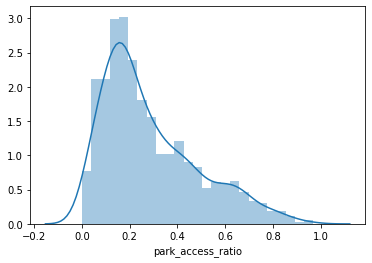

In [74]:
sns.distplot(df_metro_aggregated.park_access_ratio, bins=25);

## Save Data

In [71]:
df_metro_aggregated.to_csv('../data/Parks/data_park_access_ratio.csv')